In [1]:
import joblib
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

warnings.filterwarnings('ignore')

In [2]:
# load the data
data = pd.read_excel('../../data/distillation_column.xlsx', sheet_name='Sheet1')
data.columns = ['t_in', 'p_in', 'e_cond', 'e_boiler', 'styr_flow']
data.head()

,t_in,p_in,e_cond,e_boiler,styr_flow
0,303.15,20000.0,7128.94,8803.54,4.40306
1,303.15,22105.3,7128.94,8803.52,4.40306
2,303.15,24210.5,7128.94,8803.51,4.40306
3,303.15,26315.8,7128.94,8803.49,4.40306
4,303.15,28421.1,7128.94,8803.48,4.40306


In [3]:
# calculate the specific energy
data['specific_energy'] = (data['e_cond'] + data['e_boiler']) / data['styr_flow']
data.head()

,t_in,p_in,e_cond,e_boiler,styr_flow,specific_energy
0,303.15,20000.0,7128.94,8803.54,4.40306,3618.501678
1,303.15,22105.3,7128.94,8803.52,4.40306,3618.497136
2,303.15,24210.5,7128.94,8803.51,4.40306,3618.494865
3,303.15,26315.8,7128.94,8803.49,4.40306,3618.490323
4,303.15,28421.1,7128.94,8803.48,4.40306,3618.488051


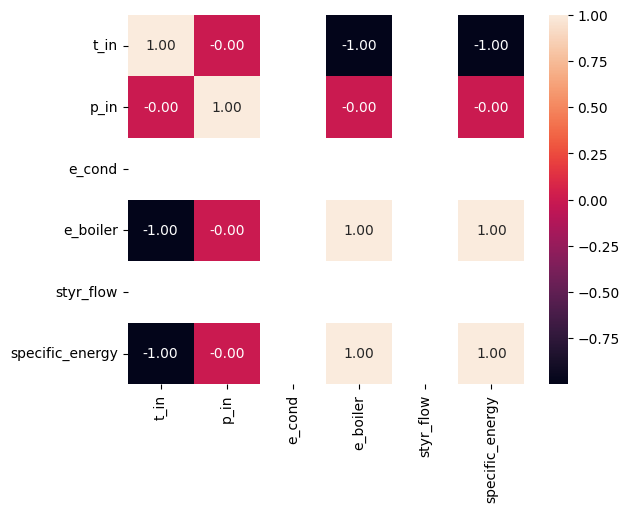

In [4]:
# check the correlations
sns.heatmap(data.corr(), annot=True, fmt='.2f')
plt.show()

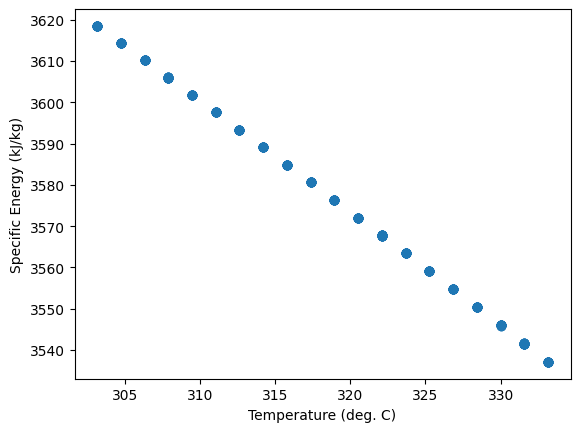

In [5]:
# plot the specific energy vs temperature
plt.scatter(data['t_in'], data['specific_energy'])
plt.xlabel('Temperature (deg. C)')
plt.ylabel('Specific Energy (kJ/kg)')
plt.show()

In [6]:
# fit the linear regression model
model = LinearRegression()
model.fit(data[['t_in']], data['specific_energy'])

# print the R^2 score
print(f'R^2 score: {model.score(data[["t_in"]], data["specific_energy"])}')

# save the model
joblib.dump(model, '../models/specific_energy_model.pkl')

R^2 score: 0.9999169539180096


['../models/specific_energy_model.pkl']